<a href="https://colab.research.google.com/github/Deriss/Tutoriais-Big-Data/blob/main/Tutorial_PySpark_Manipula%C3%A7%C3%A3o_de_Dataframes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial PySpark

O Apache Spark é um mecanismo para a análise e processamento de Big Data. O Spark facilita o processamento distribuido e em paralelo, além de ter uma biblioteca própria para aplicar técnicas de Machine Learning em grandes volumes de dados.
Neste tutorial serão apresentadas as funções básicas do PySpark para a manipulação de dados utilizando DataFrames.

## Dependencias

Para poder utilizar o PySpark no Google Colab, primeiro precisamos instalar algumas dependencias

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null # java 8
!wget -q http://archive.apache.org/dist/spark/spark-3.3.3/spark-3.3.3-bin-hadoop3.tgz #baixar o spark com Hadoop


In [ ]:
!tar xf spark-3.3.3-bin-hadoop3.tgz # extrair os archivos do Spark
!pip install -q findspark # instalar biblioteca para achar o Spark no sistema

In [ ]:
# Criando as variáveis de ambiente
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.3-bin-hadoop3"

# Inicializando o PySpark

Para testar o PySpark criaremos uma sesão local

In [ ]:
# iniciando uma sessão local
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()  # O  * em local[*] indica que vamos utilizar todas as unidades de processamento disponíveis
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better
spark

# Carregar dados

Podemos carregar dados de diferentes fontes. Nesse tutorial vamos trabalhar com dados de exemplo do Spark disponibilizados em um arquivo csv.

In [ ]:

# carregar dados exemplo
df_spark = spark.read.csv("./sample_data/california_housing_train.csv", inferSchema=True, header=True)

# ver o Schema indicando os tipos de dados de cada coluna
df_spark.printSchema()

root
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- housing_median_age: double (nullable = true)
 |-- total_rooms: double (nullable = true)
 |-- total_bedrooms: double (nullable = true)
 |-- population: double (nullable = true)
 |-- households: double (nullable = true)
 |-- median_income: double (nullable = true)
 |-- median_house_value: double (nullable = true)



# Exploração do dataset

Como o PySpark é focado em análise de grandes volumes de dados, o ideal é visualizar só uma parte do Dataframe para evitar problemas de memória. Existem diferentes métodos que podemos utilizar para obter algumas linhas do Dataframe.

O método take(n) retorna as primeiras n linhas do Dataframe

In [ ]:
df_spark.take(5)

[Row(longitude=-114.31, latitude=34.19, housing_median_age=15.0, total_rooms=5612.0, total_bedrooms=1283.0, population=1015.0, households=472.0, median_income=1.4936, median_house_value=66900.0),
 Row(longitude=-114.47, latitude=34.4, housing_median_age=19.0, total_rooms=7650.0, total_bedrooms=1901.0, population=1129.0, households=463.0, median_income=1.82, median_house_value=80100.0),
 Row(longitude=-114.56, latitude=33.69, housing_median_age=17.0, total_rooms=720.0, total_bedrooms=174.0, population=333.0, households=117.0, median_income=1.6509, median_house_value=85700.0),
 Row(longitude=-114.57, latitude=33.64, housing_median_age=14.0, total_rooms=1501.0, total_bedrooms=337.0, population=515.0, households=226.0, median_income=3.1917, median_house_value=73400.0),
 Row(longitude=-114.57, latitude=33.57, housing_median_age=20.0, total_rooms=1454.0, total_bedrooms=326.0, population=624.0, households=262.0, median_income=1.925, median_house_value=65500.0)]

O método show() pode ser utilizado para visualizar as primeiras n linhas em forma de tabela.

In [ ]:
df_spark.show(5)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|  -114.31|   34.19|              15.0|     5612.0|        1283.0|    1015.0|     472.0|       1.4936|           66900.0|
|  -114.47|    34.4|              19.0|     7650.0|        1901.0|    1129.0|     463.0|         1.82|           80100.0|
|  -114.56|   33.69|              17.0|      720.0|         174.0|     333.0|     117.0|       1.6509|           85700.0|
|  -114.57|   33.64|              14.0|     1501.0|         337.0|     515.0|     226.0|       3.1917|           73400.0|
|  -114.57|   33.57|              20.0|     1454.0|         326.0|     624.0|     262.0|        1.925|           65500.0|
+---------+--------+----

O método collect() é utilizado para retornar todos os elementos de um DataFrame. Por esse motivo, só deve ser utilizado para DataFrames pequenos, geralmente depois de ter processado os dados iniciais para evitar problemas de falta de memória. Também podemos utilizar ele para obter só algumas linhas.

In [ ]:
# Obter a primeira linha do dataframe utilizando o collect()
df_spark.collect()[0]


Row(longitude=-114.31, latitude=34.19, housing_median_age=15.0, total_rooms=5612.0, total_bedrooms=1283.0, population=1015.0, households=472.0, median_income=1.4936, median_house_value=66900.0)

In [ ]:
# Obter as três primeiras linhas do dataframe utilizando o collect()
df_spark.collect()[0:3]

[Row(longitude=-114.31, latitude=34.19, housing_median_age=15.0, total_rooms=5612.0, total_bedrooms=1283.0, population=1015.0, households=472.0, median_income=1.4936, median_house_value=66900.0),
 Row(longitude=-114.47, latitude=34.4, housing_median_age=19.0, total_rooms=7650.0, total_bedrooms=1901.0, population=1129.0, households=463.0, median_income=1.82, median_house_value=80100.0),
 Row(longitude=-114.56, latitude=33.69, housing_median_age=17.0, total_rooms=720.0, total_bedrooms=174.0, population=333.0, households=117.0, median_income=1.6509, median_house_value=85700.0)]

In [ ]:
# Obter as três primeiras colunas da primeira linha do dataframe utilizando o collect()
df_spark.collect()[1][0:3]

(-114.47, 34.4, 19.0)

# Selecionar variáveis

Para selecionar só algumas variáveis do Dataframe podemos utilizar o método select() com diferentes formas para determinar as variáveis:

In [ ]:
df_spark.select('housing_median_age').show(5)

+------------------+
|housing_median_age|
+------------------+
|              15.0|
|              19.0|
|              17.0|
|              14.0|
|              20.0|
+------------------+
only showing top 5 rows



In [ ]:
from pyspark.sql.functions import col
df_spark.select(col('housing_median_age')).show(5)

+------------------+
|housing_median_age|
+------------------+
|              15.0|
|              19.0|
|              17.0|
|              14.0|
|              20.0|
+------------------+
only showing top 5 rows



In [ ]:
from pyspark.sql.functions import col
df_spark.select(df_spark.housing_median_age).show(5)

+------------------+
|housing_median_age|
+------------------+
|              15.0|
|              19.0|
|              17.0|
|              14.0|
|              20.0|
+------------------+
only showing top 5 rows



Podemos selecionar mais de uma variável utilizando virgulas para separar o nome de cada variável

In [ ]:
df_spark.select('housing_median_age','population').show(5)

+------------------+----------+
|housing_median_age|population|
+------------------+----------+
|              15.0|    1015.0|
|              19.0|    1129.0|
|              17.0|     333.0|
|              14.0|     515.0|
|              20.0|     624.0|
+------------------+----------+
only showing top 5 rows



# Filtrar o Dataframe

Podemos filtrar as linhas de um dataset utilizando o método filter( CONDIÇÃO ) ou o método where( CONDIÇÃO). Os dois métodos funcionam da mesma forma.

In [ ]:
df_spark.filter(df_spark['housing_median_age'] == 14.0)

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
-115.37,32.82,14.0,1276.0,270.0,867.0,261.0,1.9375,80900.0
-115.53,32.73,14.0,1527.0,325.0,1453.0,332.0,1.735,61200.0
-115.58,32.79,14.0,1687.0,507.0,762.0,451.0,1.6635,64400.0
-116.22,36.0,14.0,1372.0,386.0,436.0,213.0,1.1471,32900.0
-116.24,33.73,14.0,2774.0,566.0,1530.0,505.0,3.0682,104100.0
-116.38,34.2,14.0,4985.0,1238.0,2517.0,954.0,2.0674,65000.0
-116.42,33.76,14.0,16921.0,2837.0,2524.0,1262.0,7.6281,341700.0
-116.48,33.79,14.0,9425.0,2020.0,1711.0,1000.0,2.6298,145200.0
-116.62,34.23,14.0,6438.0,1719.0,1586.0,691.0,1.6136,67400.0


In [ ]:
df_spark.filter(df_spark['housing_median_age'] < 15.0)

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
-115.37,32.82,14.0,1276.0,270.0,867.0,261.0,1.9375,80900.0
-115.5,32.75,13.0,330.0,72.0,822.0,64.0,3.4107,142500.0
-115.51,32.68,11.0,2872.0,610.0,2644.0,581.0,2.625,72700.0
-115.52,32.97,10.0,1879.0,387.0,1376.0,337.0,1.9911,67500.0
-115.52,32.67,6.0,2804.0,581.0,2807.0,594.0,2.0625,67700.0
-115.53,34.91,12.0,807.0,199.0,246.0,102.0,2.5391,40000.0
-115.53,32.73,14.0,1527.0,325.0,1453.0,332.0,1.735,61200.0
-115.55,32.78,5.0,2652.0,606.0,1767.0,536.0,2.8025,84300.0
-115.58,32.81,5.0,805.0,143.0,458.0,143.0,4.475,96300.0


In [ ]:
# Criar novas variáveis

In [ ]:
from pyspark.sql.functions import col

In [ ]:
df_spark = df_spark.withColumn('mean_people_per_household', col('population')/col('households'))
df_spark.show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+-------------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|mean_people_per_household|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+-------------------------+
|  -114.31|   34.19|              15.0|     5612.0|        1283.0|    1015.0|     472.0|       1.4936|           66900.0|       2.1504237288135593|
|  -114.47|    34.4|              19.0|     7650.0|        1901.0|    1129.0|     463.0|         1.82|           80100.0|       2.4384449244060473|
|  -114.56|   33.69|              17.0|      720.0|         174.0|     333.0|     117.0|       1.6509|           85700.0|       2.8461538461538463|
|  -114.57|   33.64|              14.0|     1501.0|         337.0|     515.0|     226.0|       3.1917|          

In [ ]:
from pyspark.sql.functions import lit
df_spark.withColumn('zeros_column', lit(0))

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,mean_people_per_household,zeros_column
-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,2.1504237288135593,0
-114.47,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.82,80100.0,2.4384449244060473,0
-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,2.8461538461538463,0
-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,2.2787610619469025,0
-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.925,65500.0,2.381679389312977,0
-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0,2.807531380753138,0
-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0,2.9083728278041074,0
-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0,2.3734177215189876,0
-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0,2.9678030303030303,0
-114.6,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0,2.904059040590406,0


In [ ]:
df_spark = df_spark.withColumnRenamed('mean_people_per_household', 'new_mean_people_per_household')

In [ ]:
df_spark = df_spark.drop('new_mean_people_per_household')


In [ ]:
df_spark.show(5)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|  -114.31|   34.19|              15.0|     5612.0|        1283.0|    1015.0|     472.0|       1.4936|           66900.0|
|  -114.47|    34.4|              19.0|     7650.0|        1901.0|    1129.0|     463.0|         1.82|           80100.0|
|  -114.56|   33.69|              17.0|      720.0|         174.0|     333.0|     117.0|       1.6509|           85700.0|
|  -114.57|   33.64|              14.0|     1501.0|         337.0|     515.0|     226.0|       3.1917|           73400.0|
|  -114.57|   33.57|              20.0|     1454.0|         326.0|     624.0|     262.0|        1.925|           65500.0|
+---------+--------+----

In [ ]:
from pyspark.sql.functions import min, max
df_spark.select(min(col('housing_median_age')))

min(housing_median_age)
1.0


In [ ]:
df_spark.select(max(col('housing_median_age')))

max(housing_median_age)
52.0


In [ ]:
# User Defined Functions

In [ ]:
def squared(s):
  return s + s
spark.udf.register("squaredWithPython", squared)

<function __main__.squared(s)>

In [ ]:
from pyspark.sql.functions import udf
from pyspark.sql.types import LongType
squared_udf = udf(squared, LongType())

df_spark.select(squared_udf(col('housing_median_age'))).show()

+---------------------------+
|squared(housing_median_age)|
+---------------------------+
|                       null|
|                       null|
|                       null|
|                       null|
|                       null|
|                       null|
|                       null|
|                       null|
|                       null|
|                       null|
|                       null|
|                       null|
|                       null|
|                       null|
|                       null|
|                       null|
|                       null|
|                       null|
|                       null|
|                       null|
+---------------------------+
only showing top 20 rows



In [ ]:
from pyspark.ml.feature import PCA

In [ ]:
from pyspark.ml.feature import VectorAssembler

# Make a VectorAssembler
vec_assembler = VectorAssembler(inputCols=['housing_median_age', 'total_rooms', 'total_bedrooms', 'households'],
                                outputCol='input_features')

In [ ]:
pca = PCA(k=2,inputCol="input_features")

In [ ]:
pca.setOutputCol("pca_features")

PCA_4014ce65fb1b

In [ ]:
df_with_vec = vec_assembler.transform(df_spark)

In [ ]:
model = pca.fit(df_with_vec)

In [ ]:
df_with_vec.show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+--------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|      input_features|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+--------------------+
|  -114.31|   34.19|              15.0|     5612.0|        1283.0|    1015.0|     472.0|       1.4936|           66900.0|[15.0,5612.0,1283...|
|  -114.47|    34.4|              19.0|     7650.0|        1901.0|    1129.0|     463.0|         1.82|           80100.0|[19.0,7650.0,1901...|
|  -114.56|   33.69|              17.0|      720.0|         174.0|     333.0|     117.0|       1.6509|           85700.0|[17.0,720.0,174.0...|
|  -114.57|   33.64|              14.0|     1501.0|         337.0|     515.0|     226.0|       3.1917|           73400.0|[14.0,1501.0,337....|

In [ ]:
model.explainedVariance

DenseVector([0.9911, 0.0083])

In [ ]:
model_with_output = model.transform(df_with_vec)

In [ ]:
model_with_output.show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+--------------------+--------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|      input_features|        pca_features|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+--------------------+--------------------+
|  -114.31|   34.19|              15.0|     5612.0|        1283.0|    1015.0|     472.0|       1.4936|           66900.0|[15.0,5612.0,1283...|[5752.67590206979...|
|  -114.47|    34.4|              19.0|     7650.0|        1901.0|    1129.0|     463.0|         1.82|           80100.0|[19.0,7650.0,1901...|[7839.84364603617...|
|  -114.56|   33.69|              17.0|      720.0|         174.0|     333.0|     117.0|       1.6509|           85700.0|[17.0,720.0,174.0...|[748.641345763431...|
|  -114.57|   33

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
pca_component1  = model_with_output.select("pca_features").rdd.map(lambda x: x.pca_features[0]).collect()
pca_component2  = model_with_output.select("pca_features").rdd.map(lambda x: x.pca_features[1]).collect()

In [ ]:
model.pc

DenseMatrix(4, 2, [-0.002, 0.9715, 0.1759, 0.1589, -0.0041, 0.2369, -0.6983, -0.6754], 0)

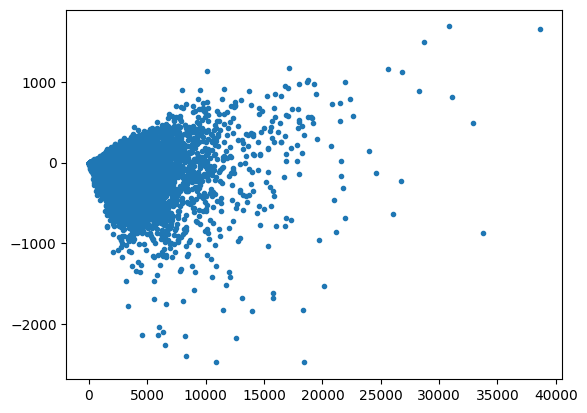

In [ ]:
x = pca_component1
y = pca_component2
plt.plot(x,y,'.')

In [ ]:
model_with_output.select("input_features").dot(model.pc)

AttributeError: ignored

(array([ 586.,  935., 1839., 2222., 2058., 1939., 2945., 1538., 1321.,
        1617.]),
 array([ 1. ,  6.1, 11.2, 16.3, 21.4, 26.5, 31.6, 36.7, 41.8, 46.9, 52. ]),
 <BarContainer object of 10 artists>)

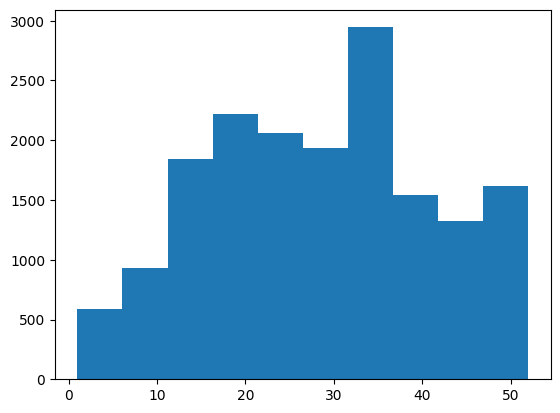

In [ ]:
plt.hist(df_spark.select('housing_median_age').toPandas())